In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

# Smart Device Usage Insights for Bellabeat

## Introduction

Smart devices have become an integral part of our daily lives, providing users with valuable insights into their health and well-being. In this analysis, we delve into the usage patterns of non-Bellabeat smart devices, aiming to uncover trends and behaviors that can inform the strategic decisions of Bellabeat, a leading provider of smart health and wellness products.

**Objective:**
Our goal is to gain meaningful insights into how consumers engage with non-Bellabeat smart devices. By understanding usage patterns, we aim to identify opportunities for improvement and innovation within the Bellabeat product line.

**Key Questions:**
 Analysis is guided by the following questions:

1. **Usage Patterns:** How do consumers interact with their smart devices on a daily basis? What are the typical usage patterns and activities recorded by these devices?

2. **Features and Preferences:** What features and functionalities are popular among users of non-Bellabeat smart devices? Are there specific preferences or behaviors that stand out?


**Application to Bellabeat:**
The insights gained from this analysis will be applied to inform the development and enhancement of Bellabeat's smart health and wellness products. By understanding consumer preferences and behaviors, we can tailor our products to meet the evolving needs of our target audience.

Throughout this analysis, we will leverage data visualization and statistical analysis to present compelling findings. Let's embark on this journey to uncover valuable insights that will shape the future of Bellabeat's smart devices.


# Analysis: Usage Patters

## Section Goal

In this section, we explore the distribution of daily activity levels captured by the smart device dataset. Our goal is to visualize how people allocate their time across different activity categories throughout the day. The dataset includes information on Very Active, Fairly Active, Lightly Active, and Sedentary minutes.

## Visualization: Activity Levels Throughout the Day

To gain insights into the distribution of activity levels, we create a bar chart that illustrates the proportion of time spent in each activity category. The chart provides a visual representation of how individuals engage in various levels of activity during a typical day.

Let's proceed with generating the chart using Plotly Express

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


# Read the data
data = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

# Convert 'ActivityDate' to datetime format
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'], format='%m/%d/%Y')

# Extract day name
data['Day'] = data['ActivityDate'].dt.day_name()

# Create the plot using Plotly Express with color-friendly palette
fig = px.bar(data, x='Day', y=['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes'],
             color_discrete_map={
                 'VeryActiveMinutes': '#1f78b4',  # Blue
                 'FairlyActiveMinutes': '#33a02c',  # Green
                 'LightlyActiveMinutes': '#e31a1c'  # Red
             },
             labels={'value': 'Minutes'},
             title='Daily Activity Breakdown',
             barmode='group',
             category_orders={'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}
             )
fig.update_xaxes(tickangle=-45)
fig.show()




### Key Insights:
### 1. Weekly Patterns
- **Very Active Minutes:** The data suggests that individuals tend to have higher levels of very active minutes on weekdays, particularly Tuesday and Wednesday, while the activity decreases on weekends and as well as Monday
- **Fairly Active Minutes:** Fairly active minutes exhibit a similar pattern to very active minutes, with higher values on weekdays and a slight incrase on weekends.
- **Lightly Active Minutes:** Lightly active minutes are relatively consistent throughout the week, with a slight increase observed on weekends.except on fridays where we see the lowest.

### 2. Peak Activity Days
- **Tuesday and Wednesday:** These days stand out as having the highest overall activity levels, especially in terms of very and fairly active minutes. This may indicate a common trend of increased physical activity at the beginning of the week.

### 3. Weekend Patterns
- **Saturday and Sunday:** Both days show a decrease in very and fairly active minutes, suggesting a potential shift towards lighter activities or rest during the weekends.

## Exploring Sedentary Behavior Throughout the Week

### Sedentary Minutes Analysis

- **Average Percentage of Sedentary Minutes:**
  - Its important to observe how much users are sedentary throughout the week in order to see how long users are not interacting with their smart watches
  - Lets investigate sedentary behavior by calculating the average percentage of sedentary minutes for each day of the week.



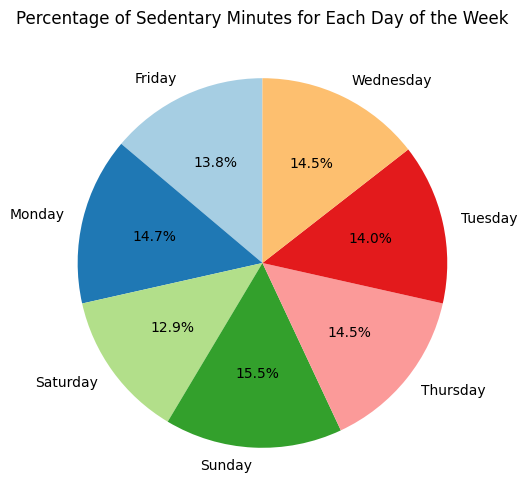

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
#MINUTES TO SHOW HOW OPNG PEOPLE ARE INAVTICE THROUGHOUT TEH DAY
# Convert 'ActivityDate' to datetime format
data['ActivityDate'] = pd.to_datetime(data['ActivityDate'])

# Extract the day of the week
data['DayOfWeek'] = data['ActivityDate'].dt.day_name()

# Calculate total sedentary minutes for each day
sedentary_minutes_per_day = data.groupby('DayOfWeek')['SedentaryMinutes'].sum()

# Calculate the total minutes for each day
activity_columns = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']
total_minutes_per_day = data.groupby('DayOfWeek')[activity_columns].sum().sum(axis=1)

# Calculate the percentage of sedentary minutes out of the total minutes for each day
sedentary_percentage_per_day = (sedentary_minutes_per_day / total_minutes_per_day) * 100

# Plotting a pie chart for each day
colors = plt.cm.Paired(range(len(sedentary_percentage_per_day)))

plt.figure(figsize=(10, 6))
plt.pie(sedentary_percentage_per_day, labels=sedentary_percentage_per_day.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Sedentary Minutes for Each Day of the Week')
plt.show()

### KeyFindings:

- **Monday to Sunday Trends:**
  - On average, individuals tend to exhibit varying levels of sedentary behavior throughout the week.
  - Many of the weekdays may show a higher percentage, possibly reflecting a more desk-bound start to the workweek.
  - Fridays and Saturday might witness a decrease in sedentary minutes, potentially indicating a more active approach toward the end of the week.

- **Weekend Patterns:**
  - Saturdays could display distinctive patterns, with individuals potentially engaging in more leisurely or recreational activities.


## Usage Patters Explored
Examining how customers use their smart devices on a daily basis, our analysis shows a pattern of weekly user activity that is consistent. The data highlights customers' willingness to staying active by showcasing common usage patterns. What's interesting to note is that our results show specific examples of sedentary behavior, which are especially apparent at times that are anticipated to align with the workweek.

The patterns that have been noticed, which range from increased inactivity at the start of the workweek to increased activity as the weekend draws closer, highlight how dynamic user interactions are. The use of smart devices seems to fit into consumers' lives, fitting in with weekend leisure activities as well as job-related responsibilities. Designing features and functionalities that meet the varied demands of users throughout can be informed by an understanding of these minor patterns. 




# Analysis: Features and Prefrences

## Section Goal

In this section, we delve deeper into user behavior by exploring the features that users engage with the most throughout the day. By analyzing how users use and log different health information throughout the week, we aim to identify patterns in user interactions with specific functionalities, shedding light on which features are particularly popular or actively utilized during different times of the day.

## Visualization: WeightLog Use Throughout the Day

To gain insights into the distribution of activity levels, lets create a pie chart that illustrates the proportion of users who utilize the Weight Log feature of the FitBit Smart Watch and those who dont in order to see how much users utilize specific features

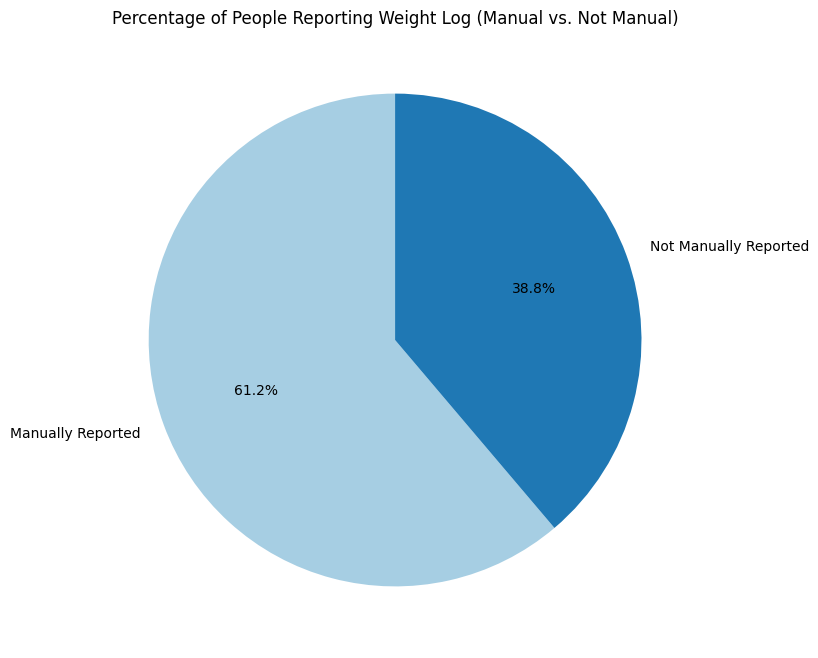

In [4]:
# Read data from CSV
df = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')  # Replace 'your_data.csv' with the actual file path
# Calculate the percentage of people who manually reported and who didn't
percentage_manual_reports = df['IsManualReport'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 8))
labels = ['Manually Reported', 'Not Manually Reported']
plt.pie(percentage_manual_reports, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of People Reporting Weight Log (Manual vs. Not Manual)')
plt.show()



## Key Findings:

1. **High Utilization:** The visual representation illustrates that a significant proportion of users consistently engaging with the weight logging feature. This indicates a strong user commitment to monitoring and recording their weight regularly.

2. **User Preference for Manual Reporting:** The pie chart breakdown highlights that a considerable percentage of users actively choose to manually report their weight logs. This suggests a user preference for maintaining a hands-on approach to their health data, possibly driven by a desire for accuracy or a more personalized tracking experience.




## Visulazation: Correlation Between Weight of Users and Usage of Watch Features 

As mentioned above we can see that weightlogging is a very popular feature among users. To expand upon that, we can determine if there is a correlation between weight of different users and how often they use the weight logging feature 

#### User Categorization:

- **Weight Categories:**
  - Users were categorized into the following groups based on weight:
    - Underweight
    - Normal
    - Overweight
    - Obese

- **Active Minutes Categories:**
  - Users were categorized based on their very active minutes into the following groups:
    - Low
    - Moderate
    - High
    - Very High

/tmp/ipykernel_19/168488586.py:8: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



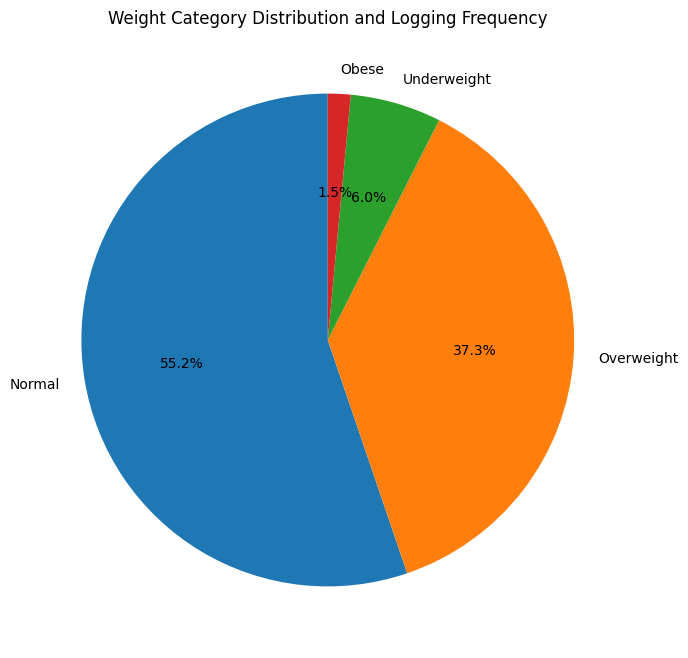

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
weight_logging_data = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

# Convert 'Date' to datetime
weight_logging_data['Date'] = pd.to_datetime(weight_logging_data['Date'])

# Categorize users based on weight
bins_weight = [0, 60, 80, 100, float('inf')]
labels_weight = ['Underweight', 'Normal', 'Overweight', 'Obese']
weight_logging_data['WeightCategory'] = pd.cut(weight_logging_data['WeightKg'], bins=bins_weight, labels=labels_weight)

# Count the number of weight logs in each category
weight_logs_count = weight_logging_data['WeightCategory'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weight_logs_count, labels=weight_logs_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Weight Category Distribution and Logging Frequency')
plt.show()

## Key Findings:

1. **Weight Category Distribution:**
   - The majority of users fall into the 'Normal' weight category.
   - 'Overweight' and 'Obese' categories also have notable representation.
   - There is a smaller proportion of users classified as 'Underweight.'

2. **Logging Frequency:**
   - Users in the 'Normal' weight category have the highest frequency of weight logging.
   - 'Overweight' and 'Obese' categories show moderate logging frequency.
   - 'Underweight' category exhibits the lowest logging frequency.


## Features and Preferences Exploration:

In the context of understanding user behaviors and preferences among non-Bellabeat smart device users, the enthusiastic engagement with weight logging emerges as a notable pattern. This high level of utilization indicates a user base that places importance on health monitoring, specifically in the realm of weight management.

The preference for manual reporting further signifies a user demographic that values a hands-on and participatory approach to their health tracking. Such insights are crucial for device manufacturers seeking to understand and cater to the preferences of their user base, potentially influencing the design and functionality of future iterations of their smart devices.

# Conclusion and Course of Action

In the exploration of non-Bellabeat smart device usage data, our analysis has illuminated significant insights into consumer behaviors and preferences. The key findings unveil dynamic patterns of user activity, with a notable interplay between sedentary behavior and active engagement throughout the week.

## Recap of Insights Derived:

1. **Usage Dynamics Throughout the Week:**
   - Users exhibit varying levels of sedentary behavior, notably higher during the early workweek and decreasing towards the weekend.
   - Fridays and Saturdays witness a decline in sedentary minutes, potentially reflecting a more active approach as the week concludes.

2. **Distinctive Weekend Patterns:**
   - Weekends showcase unique usage patterns, indicating a shift towards leisurely or recreational activities.

## Course of Action:

**Applying Insights to Bellabeat Product Presentation:**

In aligning these insights with a Bellabeat product for presentation, Bellabeat smart watches emerges as a promising candidate. Leveraging the observed user behaviors, the following course of action is recommended:

1. **Tailoring Features for Dynamic Weekdays:**
   - Enhance the product's features to align with user behaviors during weekdays, offering functionalities that cater to users during desk-oriented or work-related periods.

2. **Promoting Weekend-Focused Features:**
   - Introduce features that resonate with the observed shift towards leisure and recreation during weekends, encouraging users to engage with the device in ways that complement their weekend activities.

3. **User Engagement Campaigns:**
   - Develop targeted user engagement campaigns that highlight the product's adaptability to users' diverse lifestyles, emphasizing the balance between work and leisure.

By strategically incorporating these insights into the Time Wellness Watch, Bellabeat can showcase a product that not only meets the functional needs of users but also resonates with their dynamic usage patterns throughout the week. This approach aims to enhance user satisfaction and foster a deeper connection between consumers and the Bellabeat brand.
